# Predicting heart disease using machine learning
#### This notebook looks into various python based tools for predicting heart disease using `Machine learning` and `Data Science` in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease or not based on their medical attributes.

### We are going to follow these main approaches :

1.`Getting tools ready`.

2.`Preparing and studying data set`.

3.`Evaluating obtained metrics`.

4.`Examining the features`.

5.`Modeling the data (Fitting and Training)`.

6.`Experimenting`.

## 1. Lets get our tools ready!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

##Models from ScikitLearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,cross_val_score

##Model Eval
from sklearn.metrics import recall_score,precision_score,accuracy_score,f1_score,classification_report,confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

## 2.Lets study the data 

In [2]:
df = pd.read_csv('heart-disease(Project).csv')
df.shape

(303, 14)

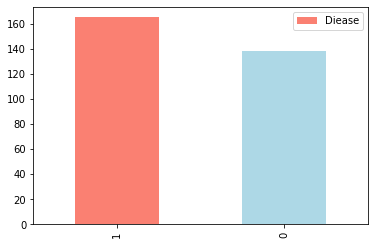

In [4]:
df['target'].value_counts().plot(kind='bar',color=['salmon','lightblue']);
plt.legend(['Diease']);

In [5]:
##Collecting information about data is important!

df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
##Lets get the data types of our data
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
crosstab = pd.crosstab(df['sex'],df['target'])

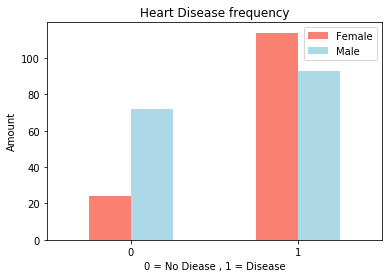

In [8]:
crosstab.plot(kind='bar',color=['salmon','lightblue']);
plt.title('Heart Disease frequency');
plt.xlabel('0 = No Diease , 1 = Disease');
plt.ylabel('Amount');
plt.legend(['Female','Male']);
plt.xticks(rotation=0);

#### Age vs. Max heart Rate for Heart Disease

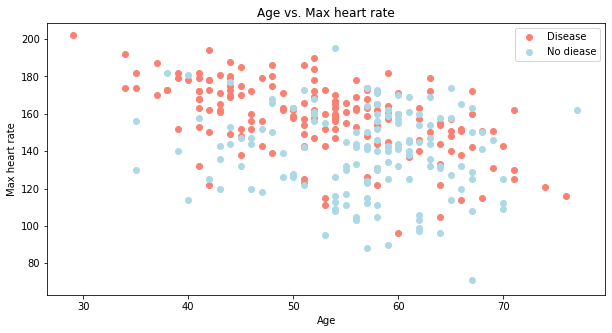

In [9]:
plt.figure(figsize=(10,5));
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            color=['salmon']);

plt.scatter(df.age[df.target==0],
             df.thalach[df.target==0],
             color=['lightblue']);

## Lets visualize
plt.title('Age vs. Max heart rate')
plt.xlabel('Age')
plt.ylabel('Max heart rate');
plt.legend(['Disease','No diease']);

## 3.Check the data features now

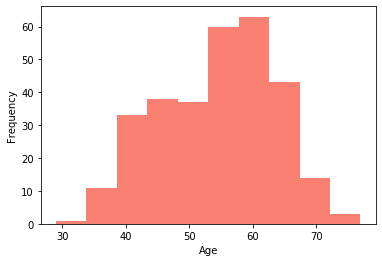

In [10]:
df.age.plot(kind='hist',color='salmon');
plt.xlabel('Age');

In [11]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


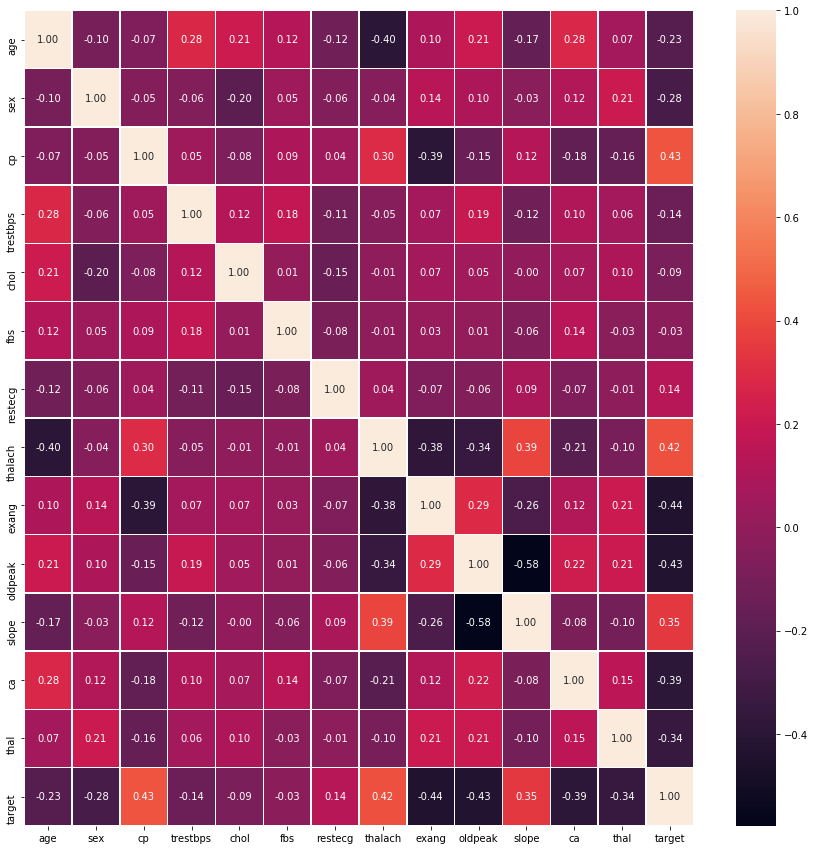

In [12]:
cor_matrix = df.corr()
fig , axes = plt.subplots(figsize=(15,15))
axes = sns.heatmap(cor_matrix,annot=True,linewidths=0.5,fmt='.2f')

## 4.Fit and Train our data set

In [13]:
## Okay! Lets get into dividing the data into test and training sections.

X = df.drop('target',axis=1)
y = df['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8360655737704918

In [14]:
grid = {'max_depth' : [None,2,4,6,8],
        'max_features':['auto','sqrt'],
        'max_samples':[None,2,4,6],
        'min_samples_leaf':[1,2],
        'min_samples_split':[1,2],
        'n_estimators':[100,200,300]}
clf_model = GridSearchCV(estimator=clf,param_grid=grid,verbose=2,n_jobs=2)
clf_model.fit(X_train,y_train)
clf_model.score(X_test,y_test);

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    3.8s
[Parallel(n_jobs=2)]: Done 212 tasks      | elapsed:   19.9s
[Parallel(n_jobs=2)]: Done 618 tasks      | elapsed:   52.5s
[Parallel(n_jobs=2)]: Done 1184 tasks      | elapsed:  1.7min
[Parallel(n_jobs=2)]: Done 1914 tasks      | elapsed:  2.8min
[Parallel(n_jobs=2)]: Done 2400 out of 2400 | elapsed:  3.5min finished


In [15]:
##Lets try all of aur available models

models = {'Logistic Regression':LogisticRegression(max_iter=1000), 
          'KNN':KNeighborsClassifier(),
          'Random Forest':RandomForestClassifier(),
          }

def fit_and_score(models,X_train,X_test,y_train,y_test):
    
    model_scores={}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)
    return model_scores    

In [16]:
model_scores = fit_and_score(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
model_scores

{'Logistic Regression': 0.819672131147541,
 'KNN': 0.5409836065573771,
 'Random Forest': 0.8524590163934426}

## Lets compare the obtained results!

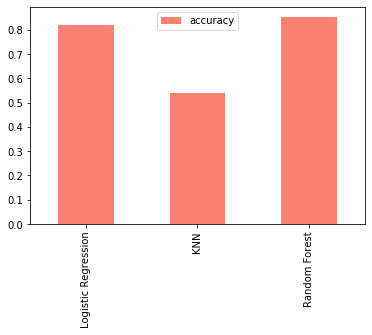

In [17]:
model_compare = pd.DataFrame(model_scores,index=['accuracy'])
model_compare.T.plot(kind='bar',color='salmon');

### Cool `Random Forest` and `Logistic regression` are great. Lets use them from now....

## 5.Now let's play with the Hyperparameters!

### 1.Using `RandomSearchCV`
### 2.Using `GridsearchCV`

In [19]:
## For logistic Regression model:
lr = LogisticRegression()
lr_grid = {'fit_intercept':[True,False],
           'max_iter':[1000,1500],
           'multi_class':['auto','sqrt'],
           'warm_start':[True,False],
           'intercept_scaling':[1,2,3],
           'C':np.logspace(-1,2,4)}
lr_model_1 = RandomizedSearchCV(estimator=lr,param_distributions=lr_grid,cv=10,verbose=2,n_jobs=2)
lr_model_1.fit(X_train,y_train)
lr_model_1.score(X_test,y_test)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.6s finished


0.8360655737704918

##### Okay, Not bad.Lets shift to `GridSearchCV`

In [20]:
lr_model_gs = GridSearchCV(estimator=lr,param_grid=lr_grid,cv=10,n_jobs=2,verbose=2)
lr_model.fit(X_train,y_train)
lr_model.score(X_test,y_test)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  87 tasks      | elapsed:    2.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.1s finished


0.819672131147541

##### The Random Search score is higher but still less than the baseline score.

#### Lets look out for our second candidate : `RandomForest Classifier`

In [21]:
clf = RandomForestClassifier()
clf_grid = {'max_depth':[1,3,6,8],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[1,2,3],
          'n_estimators':[100,200,300,500],
          'max_samples': [2,4,6],
          'max_features':['auto','sqrt']}
clf_model_1 = RandomizedSearchCV(estimator=clf,param_distributions=clf_grid,verbose=2,cv=10)
clf_model_1.fit(X_train,y_train)
clf_model_1.score(X_test,y_test)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=2, max_samples=2, max_features=auto, max_depth=8 
[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=2, max_samples=2, max_features=auto, max_depth=8, total=   0.1s
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=2, max_samples=2, max_features=auto, max_depth=8 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=2, max_samples=2, max_features=auto, max_depth=8, total=   0.1s
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=2, max_samples=2, max_features=auto, max_depth=8 
[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=2, max_samples=2, max_features=auto, max_depth=8, total=   0.1s
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=2, max_samples=2, max_features=auto, max_depth=8 
[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=2, max_samples=2, max_features=auto, max_depth=8, total=   0.1s
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=2, max_samples=2, max_features=auto, max_depth=8 
[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=2, max_samples=2, max_features=auto, max_depth=8, total=   0.1s
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=2, max_samples=2, max_features=auto, max_depth=8 
[CV]  n_estimators=100, min_samples_split=3, min_sam

C:\Users\Admin\Desktop\ml\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Admin\Desktop\ml\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Admin\Desktop\ml\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be 

[CV] n_estimators=200, min_samples_split=1, min_samples_leaf=1, max_samples=6, max_features=auto, max_depth=1 
[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=1, max_samples=6, max_features=auto, max_depth=1, total=   0.1s
[CV] n_estimators=200, min_samples_split=1, min_samples_leaf=1, max_samples=6, max_features=auto, max_depth=1 
[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=1, max_samples=6, max_features=auto, max_depth=1, total=   0.1s
[CV] n_estimators=200, min_samples_split=1, min_samples_leaf=1, max_samples=6, max_features=auto, max_depth=1 
[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=1, max_samples=6, max_features=auto, max_depth=1, total=   0.1s
[CV] n_estimators=200, min_samples_split=1, min_samples_leaf=1, max_samples=6, max_features=auto, max_depth=1 


C:\Users\Admin\Desktop\ml\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Admin\Desktop\ml\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Admin\Desktop\ml\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be 

[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=1, max_samples=6, max_features=auto, max_depth=1, total=   0.1s
[CV] n_estimators=200, min_samples_split=1, min_samples_leaf=1, max_samples=6, max_features=auto, max_depth=1 
[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=1, max_samples=6, max_features=auto, max_depth=1, total=   0.1s
[CV] n_estimators=200, min_samples_split=1, min_samples_leaf=1, max_samples=6, max_features=auto, max_depth=1 
[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=1, max_samples=6, max_features=auto, max_depth=1, total=   0.1s
[CV] n_estimators=200, min_samples_split=1, min_samples_leaf=1, max_samples=6, max_features=auto, max_depth=1 
[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=1, max_samples=6, max_features=auto, max_depth=1, total=   0.1s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_samples=4, max_features=auto, max_depth=8 
[CV]  n_estimators=300, min_samples_split=2, min_sam

C:\Users\Admin\Desktop\ml\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Admin\Desktop\ml\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Admin\Desktop\ml\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be 

[CV]  n_estimators=100, min_samples_split=1, min_samples_leaf=1, max_samples=6, max_features=sqrt, max_depth=8, total=   0.0s
[CV] n_estimators=100, min_samples_split=1, min_samples_leaf=1, max_samples=6, max_features=sqrt, max_depth=8 
[CV]  n_estimators=100, min_samples_split=1, min_samples_leaf=1, max_samples=6, max_features=sqrt, max_depth=8, total=   0.0s
[CV] n_estimators=100, min_samples_split=1, min_samples_leaf=1, max_samples=6, max_features=sqrt, max_depth=8 
[CV]  n_estimators=100, min_samples_split=1, min_samples_leaf=1, max_samples=6, max_features=sqrt, max_depth=8, total=   0.0s
[CV] n_estimators=100, min_samples_split=1, min_samples_leaf=1, max_samples=6, max_features=sqrt, max_depth=8 
[CV]  n_estimators=100, min_samples_split=1, min_samples_leaf=1, max_samples=6, max_features=sqrt, max_depth=8, total=   0.0s
[CV] n_estimators=100, min_samples_split=1, min_samples_leaf=1, max_samples=6, max_features=sqrt, max_depth=8 
[CV]  n_estimators=100, min_samples_split=1, min_sam

C:\Users\Admin\Desktop\ml\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Admin\Desktop\ml\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Admin\Desktop\ml\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be 

[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=2, max_samples=6, max_features=auto, max_depth=1, total=   0.2s
[CV] n_estimators=200, min_samples_split=3, min_samples_leaf=2, max_samples=6, max_features=auto, max_depth=1 
[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=2, max_samples=6, max_features=auto, max_depth=1, total=   0.2s
[CV] n_estimators=200, min_samples_split=3, min_samples_leaf=2, max_samples=6, max_features=auto, max_depth=1 
[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=2, max_samples=6, max_features=auto, max_depth=1, total=   0.2s
[CV] n_estimators=200, min_samples_split=3, min_samples_leaf=2, max_samples=6, max_features=auto, max_depth=1 
[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=2, max_samples=6, max_features=auto, max_depth=1, total=   0.2s
[CV] n_estimators=200, min_samples_split=3, min_samples_leaf=2, max_samples=6, max_features=auto, max_depth=1 
[CV]  n_estimators=200, min_samples_split=3, min_sam

C:\Users\Admin\Desktop\ml\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Admin\Desktop\ml\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Admin\Desktop\ml\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be 

[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=3, max_samples=6, max_features=sqrt, max_depth=3, total=   0.1s
[CV] n_estimators=200, min_samples_split=1, min_samples_leaf=3, max_samples=6, max_features=sqrt, max_depth=3 
[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=3, max_samples=6, max_features=sqrt, max_depth=3, total=   0.1s
[CV] n_estimators=200, min_samples_split=1, min_samples_leaf=3, max_samples=6, max_features=sqrt, max_depth=3 
[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=3, max_samples=6, max_features=sqrt, max_depth=3, total=   0.1s
[CV] n_estimators=200, min_samples_split=1, min_samples_leaf=3, max_samples=6, max_features=sqrt, max_depth=3 
[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=3, max_samples=6, max_features=sqrt, max_depth=3, total=   0.1s
[CV] n_estimators=200, min_samples_split=1, min_samples_leaf=3, max_samples=6, max_features=sqrt, max_depth=3 


C:\Users\Admin\Desktop\ml\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Admin\Desktop\ml\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Admin\Desktop\ml\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be 

[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=3, max_samples=6, max_features=sqrt, max_depth=3, total=   0.1s
[CV] n_estimators=200, min_samples_split=1, min_samples_leaf=3, max_samples=6, max_features=sqrt, max_depth=3 
[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=3, max_samples=6, max_features=sqrt, max_depth=3, total=   0.1s
[CV] n_estimators=200, min_samples_split=1, min_samples_leaf=3, max_samples=6, max_features=sqrt, max_depth=3 
[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=3, max_samples=6, max_features=sqrt, max_depth=3, total=   0.1s
[CV] n_estimators=200, min_samples_split=1, min_samples_leaf=3, max_samples=6, max_features=sqrt, max_depth=3 


C:\Users\Admin\Desktop\ml\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Admin\Desktop\ml\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Admin\Desktop\ml\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be 

[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=3, max_samples=6, max_features=sqrt, max_depth=3, total=   0.1s


0.7868852459016393

#####  Lets try the Grid Search CV.

In [24]:
clf_model_2 = GridSearchCV(estimator=clf,param_grid=clf_grid,verbose=2,n_jobs=2)
clf_model_2.fit(X_train,y_train)
clf_model_2.score(X_test,y_test)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  74 tasks      | elapsed:    8.4s
[Parallel(n_jobs=2)]: Done 198 tasks      | elapsed:   23.6s
[Parallel(n_jobs=2)]: Done 401 tasks      | elapsed:   51.1s
[Parallel(n_jobs=2)]: Done 684 tasks      | elapsed:  1.5min
[Parallel(n_jobs=2)]: Done 1049 tasks      | elapsed:  2.3min
[Parallel(n_jobs=2)]: Done 1494 tasks      | elapsed:  3.4min
[Parallel(n_jobs=2)]: Done 2021 tasks      | elapsed:  4.6min
[Parallel(n_jobs=2)]: Done 2628 tasks      | elapsed:  6.1min
[Parallel(n_jobs=2)]: Done 3317 tasks      | elapsed:  7.7min
[Parallel(n_jobs=2)]: Done 4086 tasks      | elapsed:  9.5min
[Parallel(n_jobs=2)]: Done 4320 out of 4320 | elapsed: 10.1min finished


0.7704918032786885

##### Okay! The baseline model worked best for the Case after all the changes in the parameters in the Models!

## 6.Lets tune other metrics of our Random Forest Classifier !

#### 1.`Confusion matrix`
#### 2.`ROC Curve` 
#### 3. `Accuracy`, `Precision`, `Precision`, `F1 Score`

To tune these metrics , lets calculate the predictions!

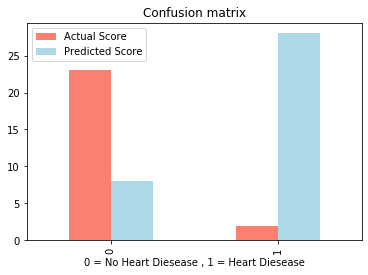

In [26]:
##1.Confusion matrix for the Classifier

clf = RandomForestClassifier()
clf.fit(X_train,y_train)
y_preds_clf = clf.predict(X_test)
conf_mat_clf = confusion_matrix(y_test,y_preds_clf)
conf_mat_clf_df = pd.DataFrame(conf_mat_clf)
conf_mat_clf_df.plot(kind='bar',color=['salmon','lightblue']);
plt.title('Confusion matrix');
plt.legend(['Actual Score','Predicted Score']);
plt.xlabel('0 = No Heart Diesease , 1 = Heart Diesease');

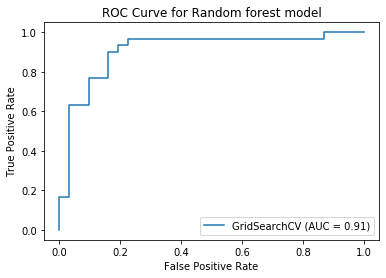

In [27]:
##2.Receiver Operating Characteristics Curve for Classifier
from sklearn.metrics import plot_roc_curve

y_preds_proba = clf.predict_proba(X_test)
y_preds_proba_postive = y_preds_proba[:,1]

tpr , fpr, thresholds = roc_curve(y_test,y_preds_proba_postive)

plot_roc_curve(clf_model,X_test,y_test);
plt.title("ROC Curve for Random forest model");

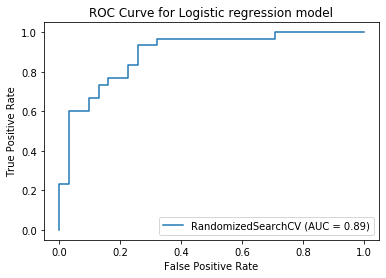

In [29]:
##Lets check the same curve for Logistic Regression

y_preds_log = lr_model_1.predict_proba(X_test)
y_preds_log_positive = y_preds_log[:,1]

plot_roc_curve(lr_model,X_test,y_test);
plt.title('ROC Curve for Logistic regression model');

C:\Users\Admin\Desktop\ml\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


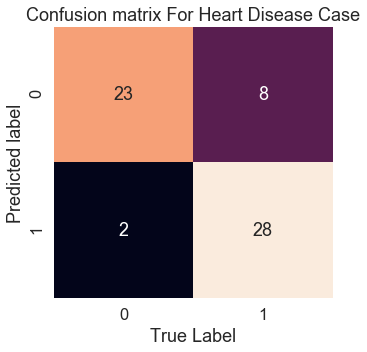

In [33]:
##Lets configure the Heatman of the Confusion Matrix
sns.set(font_scale=1.5)
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
def plot_confusion_mat(y_test,y_preds):
    fig,axes = plt.subplots(figsize=(5,5))
    axes = sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel('True Label')
    plt.ylabel('Predicted label')
    plt.title("Confusion matrix For Heart Disease Case")
plot_confusion_mat(y_test,y_preds)  

In [34]:
##Lets check the Classification report.

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82        31
           1       0.78      0.93      0.85        30

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.83        61
weighted avg       0.85      0.84      0.83        61



#### Lets cross validate out current metrics for `accuracy`,`precision`,`recall` and `f1 score` for the classifier.

In [36]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

cv_precision = cross_val_score(clf,X,y,scoring='precision',cv=10)
cv_precision_avg = np.mean(cv_precision)
cv_precision_avg

0.8284817435746229

In [37]:
cv_recall = cross_val_score(clf,X,y,cv=10,scoring='recall')
cv_recall_avg = np.mean(cv_recall)
cv_recall_avg

0.8772058823529413

In [38]:
cv_f1 = cross_val_score(clf,X,y,cv=10,scoring='f1')
cv_f1_avg = np.mean(cv_f1)
cv_f1_avg

0.8504989710872064

In [39]:
clf_accuracy = cross_val_score(clf,X,y,scoring='accuracy',cv=10)
cv_accuracy_avg = np.mean(clf_accuracy)
cv_accuracy_avg

0.8313978494623656

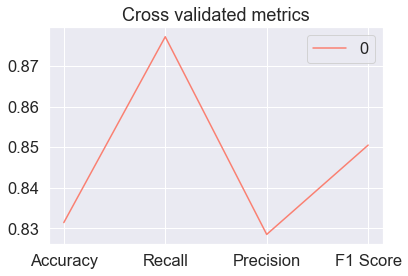

In [42]:
plot_metrics = pd.DataFrame({'Accuracy':cv_accuracy_avg,
                             'Recall':cv_recall_avg,
                             'Precision':cv_precision_avg,
                             'F1 Score':cv_f1_avg},index=[0])
plot_metrics.T.plot(color='salmon');
plt.title('Cross validated metrics');

##### Woah! The metric cross validated are far good! 

## 7.Conclusion
Not satisfied with the score ? Ask yourself the questions :


1.Can you get better `data set`?


2.Is that `model` is better than this?


3.Is the `data set` enough?


### Yes this is how you can get a better prediction and the score!